**Saad Khan and Nithun Selva**

Spring 2025

CS 444: Deep Learning

Project 1: Deep Neural Networks 

#### Week 1: VGG4 and building a deep learning library

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 18})

np.set_printoptions(suppress=True, precision=4)

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 4. Train `VGG4` on MNIST and CIFAR-10

Woohoo! VGG4 is built and tested! Time for some fun! 😎

To train in a reasonable amount of time, upload your project code to CoCalc so that you can train on the GPU. See [instructions on the class website ](https://cs.colby.edu/courses/S25/cs444/software.html#cocalc) for getting this setup.

*As noted on the website, if you have a higher-end Macbook with a Pro or Max chip and ≥ 16 GB of memory, you could probably run this workload on your computer if you would prefer. This is entirely optional and the cloud will almost certainly be faster than even the fastest Mac. Setting this up would just provide some extra convenience/flexibility. See the [macOS instructions](https://cs.colby.edu/courses/S25/cs444/software.html#tfmac) for setup.*

Run the cell below to make sure TensorFlow is running on the GPU.

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 0:
    print('Running on the GPU')
else:
    print('NOT running on the GPU')

Running on the GPU


In [3]:
from datasets import get_dataset
from vgg_nets import VGG4

### 4a. Train `VGG4` on MNIST on the GPU

This will be a "hello world" test to make sure your `fit` method is working.

Write code in the cell below to load in MNIST

In [11]:
#load mnist data
x_train, y_train, x_val, y_val, x_test, y_test, classnames = get_dataset("mnist")




# KEEP ME
print(f'Your training set data have shape {x_train.shape} and they should be (54000, 28, 28, 1)')
print(f'Your training set labels have shape {y_train.shape} and they should be (54000,)')
print(f'Your val set data have shape {x_val.shape} and they should be (6000, 28, 28, 1)')
print(f'Your val set labels have shape {y_val.shape} and they should be (6000,)')
print(f'Your test set data have shape {x_test.shape} and they should be (10000, 28, 28, 1)')
print(f'Your test set labels have shape {y_test.shape} and they should be (10000,)')

Your training set data have shape (54000, 28, 28, 1) and they should be (54000, 28, 28, 1)
Your training set labels have shape (54000,) and they should be (54000,)
Your val set data have shape (6000, 28, 28, 1) and they should be (6000, 28, 28, 1)
Your val set labels have shape (6000,) and they should be (6000,)
Your test set data have shape (10000, 28, 28, 1) and they should be (10000, 28, 28, 1)
Your test set labels have shape (10000,) and they should be (10000,)


Train `VGG4` in the cell below on MNIST for `7` epochs and a batch size of `1024`! Print out your accuracy on the test set when training is done.

The **entire** process of training and evaluating test accuracy should take no more than 1 min (*at most!*). If it is taking longer, seek help.

Your print outs should look something like:

```
---------------------------------------------------------------------------
Dense layer output(output) shape: [1, 10]
Dropout layer output(dropout1) shape: [1, 128]
Dense layer output(dense1) shape: [1, 128]
Flatten layer output(flat) shape: [1, 12544]
MaxPool2D layer output(maxpool1) shape: [1, 14, 14, 64]
Conv2D layer output(conv2) shape: [1, 28, 28, 64]
Conv2D layer output(conv1) shape: [1, 28, 28, 64]
---------------------------------------------------------------------------
Epoch 0/6, Training loss 1.54, Val loss 0.33, Val acc 89.94 
Epoch 0 took: blah0 secs
Epoch 1/6, Training loss 0.42, Val loss 0.17, Val acc 94.59 
Epoch 1 took: blah1 secs
...
Epoch 6/6, Training loss surprise, Val loss surprise, Val acc surprise
Epoch 6 took: blah6 secs
Finished training after 7 epochs!
VGG4 MNIST Test accuracy: surprise%
```

The val and test accuracy should be satisfyingly high — in the high 90s.

In [12]:
# KEEP THIS SEED
tf.random.set_seed(0)

#train vgg4 model on mnist for 7 epochs with batch size 1024, report the accuracy on the test set
model = VGG4(C=10, input_feats_shape=(28, 28, 1))
model.compile(optimizer='adam', loss='cross_entropy')
train_loss_hist, val_loss_hist, val_acc_hist, e = model.fit(x_train, y_train, x_val, y_val, max_epochs=7, batch_size=1024)

#calculate the accuracy on the test set
model.set_layer_training_mode(False)  # Disable dropout & batch norm during evaluation
test_acc, test_loss = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

---------------------------------------------------------------------------
Dense layer output(Output) shape: [1, 10]
Dropout layer output(Dropout) shape: [1, 128]
Dense layer output(Dense_1) shape: [1, 128]
Flatten layer output(Flatten) shape: [1, 12544]
MaxPool2D layer output(MaxPool_1) shape: [1, 14, 14, 64]
Conv2D layer output(Conv2D_2) shape: [1, 28, 28, 64]
Conv2D layer output(Conv2D_1) shape: [1, 28, 28, 64]
---------------------------------------------------------------------------
Epoch 1/7 - Train Loss: 1.5478, Val Loss: 0.3252, Val Acc: 0.9037
Epoch 1 completed in 5.02 seconds.
Epoch 2/7 - Train Loss: 0.4575, Val Loss: 0.1944, Val Acc: 0.9451
Epoch 2 completed in 2.03 seconds.
Epoch 3/7 - Train Loss: 0.3585, Val Loss: 0.1574, Val Acc: 0.9535
Epoch 3 completed in 2.06 seconds.
Epoch 4/7 - Train Loss: 0.3114, Val Loss: 0.1350, Val Acc: 0.9607
Epoch 4 completed in 1.88 seconds.
Epoch 5/7 - Train Loss: 0.2750, Val Loss: 0.1162, Val Acc: 0.9684
Epoch 5 completed in 1.79 seconds.


### 4b. Train `VGG4` on MNIST on the CPU

To appreciate the advantage for training deep networks on GPUs instead of your computer's CPU, copy-paste your code above that trains your VGG4 net on MNIST below. Instead of running it on CoCalc, run it locally on your computer. Be sure to print out the time per epoch.

*If the net takes >2 minutes per epoch on your computer, just train for one epoch then call it quits :)*

In [5]:
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 0:
    print('Running on the GPU')
else:
    print('NOT running on the GPU')


# KEEP THIS SEED
tf.random.set_seed(0)

#train vgg4 model on mnist for 7 epochs with batch size 1024, report the accuracy on the test set
model = VGG4(C=10, input_feats_shape=(28, 28, 1))
model.compile(optimizer='adam', loss='cross_entropy')
train_loss_hist, val_loss_hist, val_acc_hist, e = model.fit(x_train, y_train, x_val, y_val, max_epochs=7, batch_size=1024)

#calculate the accuracy on the test set
model.set_layer_training_mode(False)  # Disable dropout & batch norm during evaluation
test_acc, test_loss = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

NOT running on the GPU
---------------------------------------------------------------------------
Dense layer output(Output) shape: [1, 10]
Dropout layer output(Dropout) shape: [1, 128]
Dense layer output(Dense_1) shape: [1, 128]
Flatten layer output(Flatten) shape: [1, 12544]
MaxPool2D layer output(MaxPool_1) shape: [1, 14, 14, 64]
Conv2D layer output(Conv2D_2) shape: [1, 28, 28, 64]
Conv2D layer output(Conv2D_1) shape: [1, 28, 28, 64]
---------------------------------------------------------------------------
Epoch 1/7 - Train Loss: 1.5415, Val Loss: 0.3168, Val Acc: 0.9047
Epoch 1 completed in 23.82 seconds.
Epoch 2/7 - Train Loss: 0.2644, Val Loss: 0.1466, Val Acc: 0.9563
Epoch 2 completed in 21.80 seconds.
Epoch 3/7 - Train Loss: 0.1527, Val Loss: 0.1174, Val Acc: 0.9652
Epoch 3 completed in 21.59 seconds.
Epoch 4/7 - Train Loss: 0.1156, Val Loss: 0.0942, Val Acc: 0.9733
Epoch 4 completed in 21.54 seconds.
Epoch 5/7 - Train Loss: 0.0945, Val Loss: 0.0835, Val Acc: 0.9765
Epoch 5 

### 4c. Questions

**Question 1:** Approximately how long did it take for 1 epoch of training with and without the GPU. Compute the relative compute time (`gpu_time_per_epoch`/`cpu_time_per_epoch`). What do you think?

**Answer 1:** Given that on average for one epoch on the GPU it took around ~2 seconds, and on the CPU it took ~21 seconds, running it on the GPU was over 10x faster!

### 4d. Train `VGG4` on CIFAR-10

Now let's train on CIFAR-10. Run this (*and all subsequent large training sessions*) on CoCalc/the GPU 😊

Write code in the cell below to load in CIFAR-10.

In [13]:
x_train, y_train, x_val, y_val, x_test, y_test, classnames = get_dataset("cifar10")


# KEEP ME
print(f'Your training set data have shape {x_train.shape} and they should be (45000, 32, 32, 3)')
print(f'Your training set labels have shape {y_train.shape} and they should be (45000,)')
print(f'Your val set data have shape {x_val.shape} and they should be (5000, 32, 32, 3)')
print(f'Your val set labels have shape {y_val.shape} and they should be (5000,)')
print(f'Your test set data have shape {x_test.shape} and they should be (10000, 32, 32, 3)')
print(f'Your test set labels have shape {y_test.shape} and they should be (10000,)')

Your training set data have shape (45000, 32, 32, 3) and they should be (45000, 32, 32, 3)
Your training set labels have shape (45000,) and they should be (45000,)
Your val set data have shape (5000, 32, 32, 3) and they should be (5000, 32, 32, 3)
Your val set labels have shape (5000,) and they should be (5000,)
Your test set data have shape (10000, 32, 32, 3) and they should be (10000, 32, 32, 3)
Your test set labels have shape (10000,) and they should be (10000,)


Train `VGG4` on CIFAR-10 in the cell below for `15` epochs and use a batch size of `128`.

*You should anticipate 10-20 secs per epoch of training. Thus, the whole training session should take ~2.5-5 mins. If this is far off, please seek help.*

Plot the training and val loss over epochs. Put test acc in the title. *If everything is working, your training and validation loss should steadily decrease then start to plateau by the end of training.*

In [14]:
# KEEP THIS SEED
tf.random.set_seed(0)

#train vgg4 model on cifar10 for 15 epochs with batch size 128, report the accuracy on the test set

model = VGG4(C=10, input_feats_shape=(32, 32, 3))
model.compile(optimizer='adam', loss='cross_entropy')
train_loss_hist, val_loss_hist, val_acc_hist, e = model.fit(x_train, y_train, x_val, y_val, max_epochs=15, batch_size=128)

#calculate the accuracy on the test set
model.set_layer_training_mode(False)  # Disable dropout & batch norm during evaluation
test_acc, test_loss = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


---------------------------------------------------------------------------
Dense layer output(Output) shape: [1, 10]
Dropout layer output(Dropout) shape: [1, 128]
Dense layer output(Dense_1) shape: [1, 128]
Flatten layer output(Flatten) shape: [1, 16384]
MaxPool2D layer output(MaxPool_1) shape: [1, 16, 16, 64]
Conv2D layer output(Conv2D_2) shape: [1, 32, 32, 64]
Conv2D layer output(Conv2D_1) shape: [1, 32, 32, 64]
---------------------------------------------------------------------------
Epoch 1/15 - Train Loss: 1.8463, Val Loss: 1.5587, Val Acc: 0.4453
Epoch 1 completed in 4.71 seconds.
Epoch 2/15 - Train Loss: 1.5015, Val Loss: 1.2964, Val Acc: 0.5367
Epoch 2 completed in 3.34 seconds.
Epoch 3/15 - Train Loss: 1.3426, Val Loss: 1.1566, Val Acc: 0.5915
Epoch 3 completed in 3.32 seconds.
Epoch 4/15 - Train Loss: 1.2284, Val Loss: 1.0618, Val Acc: 0.6220
Epoch 4 completed in 3.27 seconds.
Epoch 5/15 - Train Loss: 1.1480, Val Loss: 1.0077, Val Acc: 0.6470
Epoch 5 completed in 3.25 seco

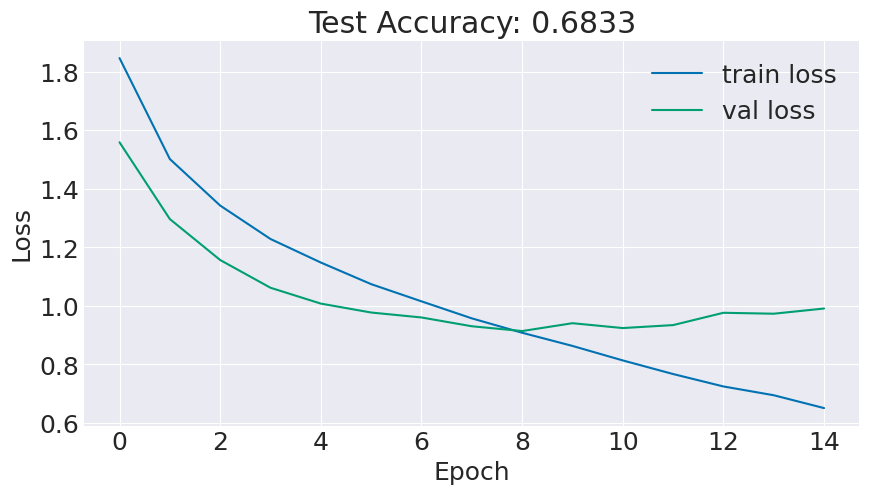

In [15]:
#plot training and validation loss with test acc as the title
plt.figure(figsize=(10, 5))
plt.plot(train_loss_hist, label='train loss')
plt.plot(val_loss_hist, label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title(f'Test Accuracy: {test_acc:.4f}')
plt.show()

### 4e. Experiment: Effect of batch size on runtime and accuracy

To develop your intuition about how the choice of batch size generally affects runtime and accuracy on a dataset like CIFAR-10, run an experiment in which fresh `VGG4` nets are trained for `15` epochs with one of the following batch sizes:<br/>
`[128, 256, 512, 1024, 2048]`. After each training run, record the test accuracy and runtime.

Create two plots:
1. The test accuracy (y axis) as a function of the batch size (x axis). There should be 5 markers joined by a single curve.
2. The runtime (y axis) as a function of the batch size (x axis). There should be 5 markers joined by a single curve.

**Note:**
- Your `fit` method prints the runtime per epoch, but in this task you should record the total runtime over training and prediction. (in seconds). To do this, it may make sense to use the time module to record the total time in the notebook cell below.
- You should be running this on the GPU!

In [9]:
import time

In [10]:
# KEEP THIS SEED
tf.random.set_seed(0)


### 4f. Questions

**Question 2:** What do the plots suggest to you about the relationship between batch size and accuracy? Please be specific,citing evidence from your plots.

**Question 3:** Do you find this relationship surprising? Why or why not?

**Answer 2:** 

**Answer 3:** 